## Abstract

# Blog Post 1: Palmer Penguins
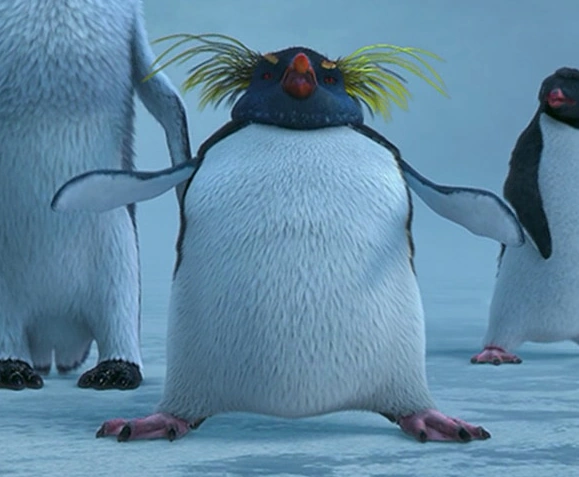

In my blog post, I explore the best features to identify penguin species from the Palmer Penguins data set created by ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Dr. Kristen Gorman ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍and ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍the ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍Palmer Station. I first explore the significance of some variables through data visualization, trying to glean key differences in penguin species, one of which appears to be island. Using a brute force search of all the possible combinations of one qualitative and two quantitative variables, I find that island, culmen length, and culmen depth are the three best features to predict the test set with 100% accuracy. 

## Setup

In [2]:
import pandas as pd

train_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

In [3]:
train.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0809,31,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N63A1,Yes,11/24/08,40.9,16.6,187.0,3200.0,FEMALE,9.08458,-24.54903,NaN
1,PAL0809,41,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N74A1,Yes,11/24/08,49.0,19.5,210.0,3950.0,MALE,9.53262,-24.66867,NaN
2,PAL0708,4,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N32A2,Yes,11/27/07,50.0,15.2,218.0,5700.0,MALE,8.25540,-25.40075,NaN
3,PAL0708,15,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,Yes,12/3/07,45.8,14.6,210.0,4200.0,FEMALE,7.79958,-25.62618,NaN
4,PAL0809,34,Chinstrap penguin (Pygoscelis antarctica),Anvers,Dream,"Adult, 1 Egg Stage",N65A2,Yes,11/24/08,51.0,18.8,203.0,4100.0,MALE,9.23196,-24.17282,NaN


## Data Preperation

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

## Explore

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

<function matplotlib.pyplot.show(close=None, block=None)>

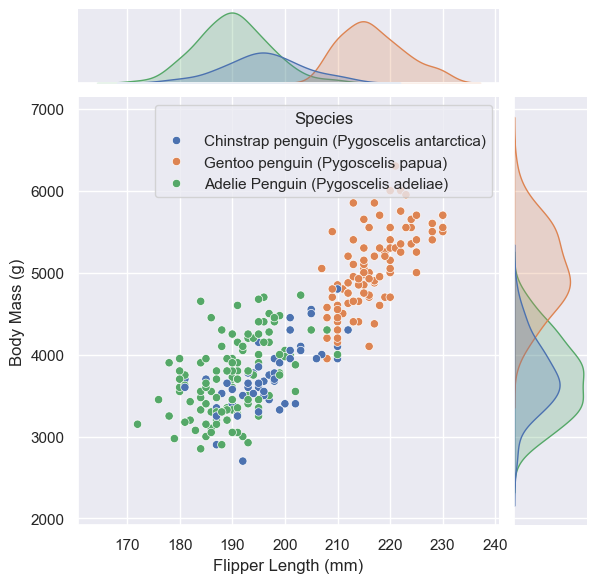

In [6]:
## graph1
data= train
graph1 = sns.jointplot(data= data, x= "Flipper Length (mm)", y= "Body Mass (g)", hue = "Species")
plt.show

The main takeaway I had from this graph is that flipper length is a great identifier for the Gentoo penguins, as they all have flipper lengths at about 208 mm or above, which is much longer than the average of an Adelie or a Chinstrap penguin. However, the body mass and flipper length are similar for and Chinstrap penguins, which means that they might not be the best identifier of a penguin. We can see that the distributions for body mass of the two species have almost complete overlap, with Adelie penguins having less devation in mass by penguin.

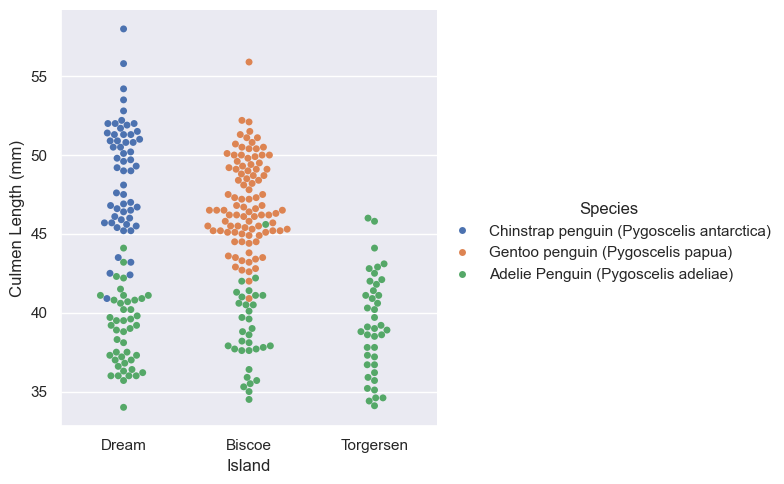

In [7]:
data = train
graph2= sns.catplot(data= data, kind= "swarm", x= "Island", y="Culmen Length (mm)", hue= "Species")

This visualization is very helpful for deciding which categories to model. The first thing I notice is that the Chinstrap and Gentoo species are native to one island and one island only (dream and biscoe, respectiveley). While the Adelie penguins appear on all 3 islands, they are the only ones that appear on Torgenrsen, so any penguin found on Torgersen should automatically be identified as a Adelie. Culmen length is also a good diffentiator, 

In [8]:
data.groupby("Species").aggregate({"Flipper Length (mm)" : "mean", 
                                   "Culmen Length (mm)" : "mean",
                                    "Culmen Depth (mm)" : "mean",
                                    "Body Mass (g)" : ["mean", "min", "max"]})

Flipper Length (mm)  \
                                                         mean   
Species                                                         
Adelie Penguin (Pygoscelis adeliae)                190.084034   
Chinstrap penguin (Pygoscelis antarctica)          196.000000   
Gentoo penguin (Pygoscelis papua)                  216.752577   

                                          Culmen Length (mm)  \
                                                        mean   
Species                                                        
Adelie Penguin (Pygoscelis adeliae)                38.970588   
Chinstrap penguin (Pygoscelis antarctica)          48.826316   
Gentoo penguin (Pygoscelis papua)                  47.073196   

                                          Culmen Depth (mm) Body Mass (g)  \
                                                       mean          mean   
Species                                                                     
Adelie Penguin (Pygoscelis adeliae)               18.409244   3718.487395   
Chinstrap penguin (Pygoscelis antarctica)         18.366667   3743.421053   
Gentoo penguin (Pygoscelis papua)                 14.914433   5039.948454   

                                                           
                                              min     max  
Species                                                    
Adelie Penguin (Pygoscelis adeliae)        2850.0  4725.0  
Chinstrap penguin (Pygoscelis antarctica)  2700.0  4800.0  
Gentoo penguin (Pygoscelis papua)          3950.0  6300.0

This table shows clear distinctions between the penguins for the different quantitative variables highlighted here. For example, while Adelie and Chinstraps have similar flipper lengths, masses, and culmen depths, they vary vastly in clumen length. Gentoos can be differentiated through their much larger average body mass and longer flippers. There shouild be very little overlap betrween Adelie and Gentoo, as they very significantly on the different quantitative variables.  

## Model

In [9]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression

# these are not actually all the columns: you'll 
# need to add any of the other ones you want to search for
all_qual_cols = ["Clutch Completion", "Island", "Stage", "Sex"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)" ]

best_score= 0
for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    #print(cols)
    LR = LogisticRegression()
    LR.fit(X_train[cols], y_train)
    score = LR.score(X_train[cols], y_train)
    if score > best_score:
      best_score = score
      best_cols = cols
print(best_score, best_cols)
    # you could train models and score them here, keeping the list of 
    # columns for the model that has the best score. 

/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

0.99609375 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']


/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

In [10]:
LR = LogisticRegression()
LR.fit(X_train[best_cols], y_train)

test_url = "https://raw.githubusercontent.com/PhilChodrow/ml-notes/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

/opt/anaconda3/envs/ml-0451/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:

X_test, y_test = prepare_data(test)
LR.score(X_test[best_cols], y_test)


1.0

## Evaluate

In [12]:
from matplotlib import pyplot as plt
import numpy as np
print(best_cols)



['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen']


In [13]:
from matplotlib.patches import Patch

def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]

    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1], 
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()



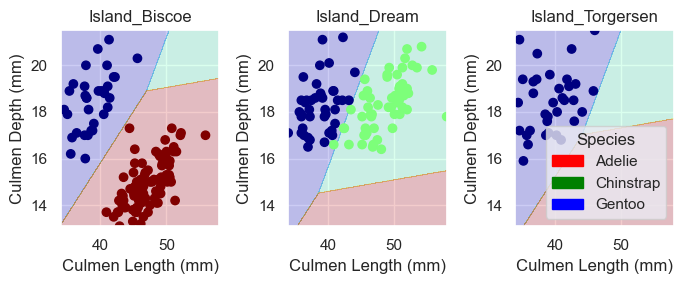

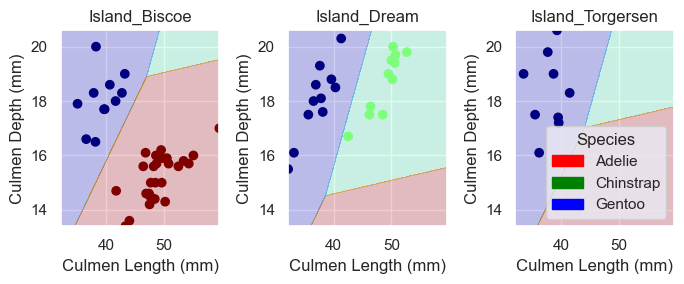

In [14]:
plot_regions(LR, X_train[best_cols], y_train)
plot_regions(LR, X_test[best_cols], y_test)


In [15]:
from sklearn.metrics import confusion_matrix

y_test_pred = LR.predict(X_test[best_cols])
Confusion_test = confusion_matrix(y_test, y_test_pred)
print(Confusion_test)
y_train_pred = LR.predict(X_train[best_cols])
Confusion_train = confusion_matrix(y_train, y_train_pred)
print(Confusion_train)

[[31  0  0]
 [ 0 11  0]
 [ 0  0 26]]
[[108   0   0]
 [  1  55   0]
 [  0   0  92]]


Since there are no errors in the test set, the first confusion matrix is diagonalizable. There are no penguins that are classified incorrectly. Because of this, I also created the same matrix for the train dataset, where one Chinstrap penguin was classified an Adelie. I wonder if this could be in part because the number of penguins in each set where drastically different, and since there a lot more Adelie I wonder if penguins were more likely to be classified as such.

## Discussion

My key takeaway from the analysis is that when using one feature on it's own, or a pair of correlating features only (i.e. culmen length and culmen depth), logistic regression is decently accurate. The more features you pair together, the more accurate the logistic regression becomes, although the computing power escalates quickly. Island is a great quantitative identifier for penguins, as shown in figure 2 because Chinstraps and Gentoos exist only on different islands, so there is no overlap or mispredicting. 

On competing my first blog post, I found the process very rewarding. I like being able to write out my ideas and complete my analysis all in the same document. I haven't coded in a while, so debugging at first was difficult, but it got easier as I went on. I learned that, with both the coding and the discussion, it's often best to step away for a bit and come back to the work with fresh eyes. That helped me when I was looking for significance in the explore step, and throughout debugging my model and the ensuing discussion. 